In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [ ]:
#download a file .wav in my drive
import gdown

!gdown https://drive.google.com/uc?id=1uAptITRlDgs-rgziCVfjzEF7YxMh5wdS

Downloading...
From: https://drive.google.com/uc?id=1uAptITRlDgs-rgziCVfjzEF7YxMh5wdS
To: /content/CaiLuong.001.wav
100% 1.32M/1.32M [00:00<00:00, 106MB/s]


In [ ]:
#Đọc tệp âm thanh lưu trữ
path = '/content/CaiLuong.001.wav'
frequency_sampling, audio_signal = wavfile.read(path)

<ipython-input-4-100c327f374a>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frequency_sampling, audio_signal = wavfile.read(path)


In [ ]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / float(frequency_sampling), 2), 'seconds')


Signal shape: (661500,)
Signal Datatype: int16
Signal duration: 30.0 seconds


In [ ]:
#Chuẩn hóa dữ liệu
audio_signal = audio_signal / np.power(2, 15)

In [ ]:
#Trích xuất độ dài và một nửa độ dài của tín hiệu
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(int)
length_signal, half_length

(661500, 330751)

In [ ]:
signal_frequency = np.fft.fft(audio_signal)

In [ ]:
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2

In [ ]:
len_fts = len(signal_frequency)

In [ ]:
signal_power = 10 * np.log10(signal_frequency)

In [ ]:
if length_signal % 2:
    signal_frequency[1:len_fts] *= 2
else:
    signal_frequency[1:len_fts-1] *= 2

In [ ]:
x_axis = np.arange(0, half_length, 1) * (frequency_sampling / length_signal) / 1000.0

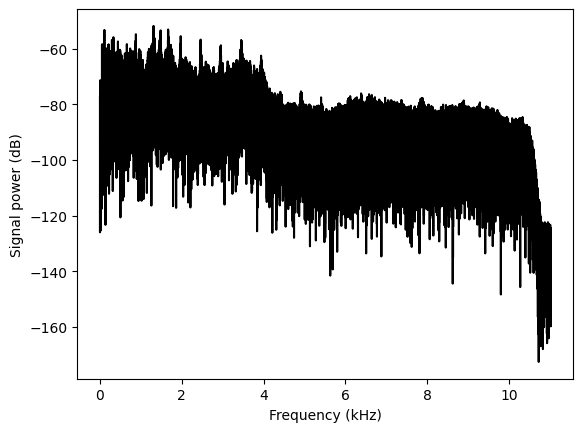

In [ ]:
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()